# Cases for Nurse Availability Levels

Task:

    Evaluate Shift Coverage over Nurse availability starting from 0 to 5times shift requirements

In [1]:
import abm_scheduling
from abm_scheduling import Schedule as Schedule
from abm_scheduling import Nurse as Nurse

In [2]:
import time
from datetime import datetime

import abm_scheduling.Log
from abm_scheduling.Log import Log as Log

import matplotlib.pylab as plt
%matplotlib inline

log = Log()

## Shift coverage on number of nurses

In [30]:
beta = 0.8
p_to_accept_negative_change = .001
degree_of_agent_availability = 0.7
min_number_of_runs_with_shift_coverage_1 = 3
works_weekends = True
num_nurses_per_shift = 5

In [31]:
num_nurses = 0
number_of_runs_with_shift_coverage_1 = 0
nurses = []
run_results_1 = []

schedule = Schedule(num_nurses_needed=num_nurses_per_shift, is_random=True)
model = abm_scheduling.NSP_AB_Model()

    
while number_of_runs_with_shift_coverage_1 < min_number_of_runs_with_shift_coverage_1:
    nurse = Nurse(id_name=num_nurses)
    nurse.generate_shift_preferences(degree_of_agent_availability=0.7, works_weekends=True)
    nurses.append(nurse)
    num_nurses += 1
    
    results = model.run(schedule_org=schedule,
                       nurses_org=nurses,
                       beta=beta,
                       p_to_accept_negative_change=p_to_accept_negative_change,
                       utility_function_parameters=None,
                       print_stats=False)
    run_results_1.append(results)

    if results.shift_coverage >= 1:
        number_of_runs_with_shift_coverage_1 += 1

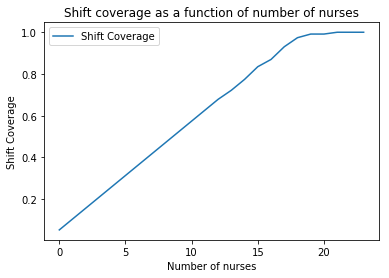

In [32]:
plt.figure()
plt.plot(range(num_nurses), [r.shift_coverage for r in run_results_1], label="Shift Coverage")
plt.title(f'Shift coverage as a function of number of nurses')
plt.xlabel("Number of nurses")
plt.ylabel("Shift Coverage")
plt.legend()
plt.show()

In [34]:
print(run_results_1[20].shift_coverage)
print(run_results_1[21].shift_coverage)

0.991304347826087
1.0


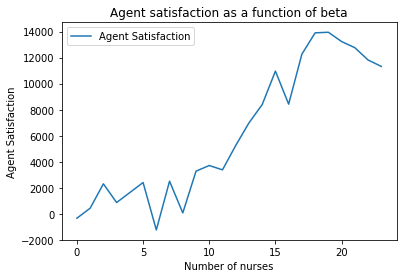

In [35]:
plt.figure()
plt.plot(range(num_nurses), [r.total_agent_satisfaction for r in run_results_1], label="Agent Satisfaction")
plt.title(f'Agent satisfaction as a function of beta')
plt.xlabel("Number of nurses")
plt.ylabel("Agent Satisfaction")
plt.legend()
plt.show()

In [43]:
data_over_nr_nurses = []
for r in run_results_1:
    data = []
    for nurse in r.nurses:
        assigned_shifts = len(nurse.shifts)
        data.append(assigned_shifts/ nurse.minimum_shifts)
    data_over_nr_nurses.append(data)

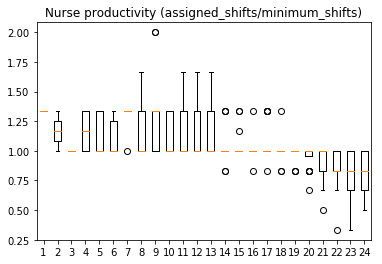

In [50]:
fig1, ax1 = plt.subplots()
ax1.set_title('Nurse productivity (assigned_shifts/minimum_shifts)')
w = ax1.boxplot(data_over_nr_nurses)

## Shift coverage over nurse availability

In [19]:
beta = 0.8
p_to_accept_negative_change = .001
min_number_of_runs_with_shift_coverage_1 = 3
works_weekends = True
num_nurses_per_shift = 5

In [24]:
num_nurses = 22
values_degree_of_agent_availability = [i * 0.1 for i in range(2, 10)]
nurses = []
run_results_2 = []

schedule = Schedule(num_nurses_needed=num_nurses_per_shift, is_random=True)
model = abm_scheduling.NSP_AB_Model()
    
for degree_of_agent_availability in values_degree_of_agent_availability:

    nurses = model.generate_nurses(num_nurses=num_nurses,
                               degree_of_agent_availability=degree_of_agent_availability,
                               works_weekends=works_weekends)

    results = model.run(schedule_org=schedule,
                       nurses_org=nurses,
                       beta=beta,
                       p_to_accept_negative_change=p_to_accept_negative_change,
                       utility_function_parameters=None,
                       print_stats=False)
    run_results_2.append(results)

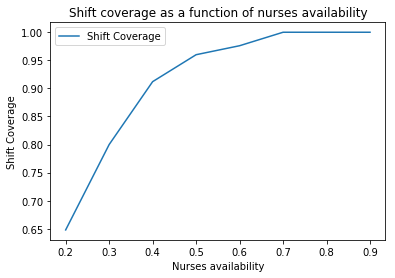

In [27]:
plt.figure()
plt.plot(values_degree_of_agent_availability, [r.shift_coverage for r in run_results_2], label="Shift Coverage")
plt.title(f'Shift coverage as a function of nurses availability')
plt.xlabel("Nurses availability")
plt.ylabel("Shift Coverage")
plt.legend()
plt.show()

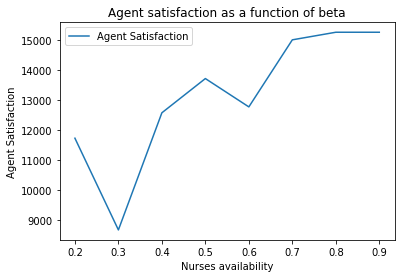

In [29]:
plt.figure()
plt.plot(values_degree_of_agent_availability, [r.total_agent_satisfaction for r in run_results_2], label="Agent Satisfaction")
plt.title(f'Agent satisfaction as a function of beta')
plt.xlabel("Nurses availability")
plt.ylabel("Agent Satisfaction")
plt.legend()
plt.show()